In [ ]:

!pip uninstall torch torchvision torchtext torchdata torchaudio --yes
!pip install torch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0

In [5]:
import os
import torch
import networkx as nx
import pandas
print("Using torch", torch.__version__)

Using torch 2.1.0+cu121


In [ ]:
!pip install  --verbose torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-2.1.0+cu121.html
!pip install  --verbose ogb  # for datasets

In [7]:
from torch_geometric.data import Data
from torch_geometric import nn
import torch_geometric.transforms as T
import numpy as np
import torch.optim as optim


In [8]:
import pickle
def load_data(filename):
    with open(filename, 'rb') as file:
        data = pickle.load(file)
    return data

In [9]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [10]:
email_data2 = load_data('/content/gdrive/My Drive/email_data2.pkl')

In [11]:
#get class
def get_num_classes(data):
  num_classes = 0
  num_classes = len(data.y.unique())

  return num_classes

In [12]:
num_features = email_data2.num_features
num_classes = get_num_classes(email_data2)

In [13]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        # torch.manual_seed(12345)
        self.lin1 = Linear(num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=16)
print(model)

MLP(
  (lin1): Linear(in_features=1, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=2, bias=True)
)


In [14]:
print(email_data2.y)

tensor([0., 0., 1.,  ..., 0., 0., 0.])


Epoch: 001, Loss: 0.7908, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 002, Loss: 0.8063, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 003, Loss: 0.7949, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 004, Loss: 0.8006, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 005, Loss: 0.7913, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 006, Loss: 0.8019, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 007, Loss: 0.7950, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 008, Loss: 0.7894, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 009, Loss: 0.7875, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 010, Loss: 0.7999, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 011, Loss: 0.7935, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 012, Loss: 0.8030, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 013, Loss: 0.7982, Train Accuracy: 0.1152, Validation Acc

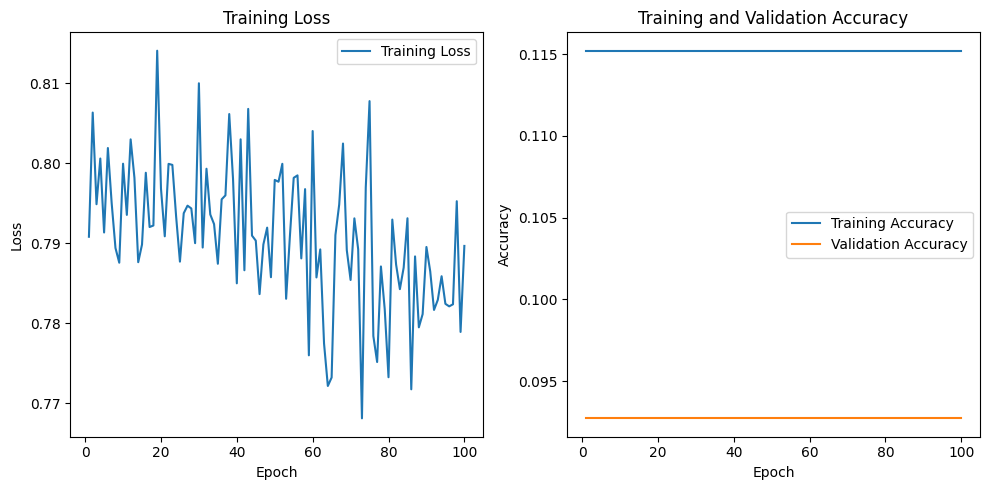

Epoch: 001, Loss: 0.7863, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 002, Loss: 0.7852, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 003, Loss: 0.7776, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 004, Loss: 0.7756, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 005, Loss: 0.7860, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 006, Loss: 0.7914, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 007, Loss: 0.7719, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 008, Loss: 0.7884, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 009, Loss: 0.7745, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 010, Loss: 0.7812, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 011, Loss: 0.7696, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 012, Loss: 0.7855, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 013, Loss: 0.7865, Train Accuracy: 0.1152, Validation Acc

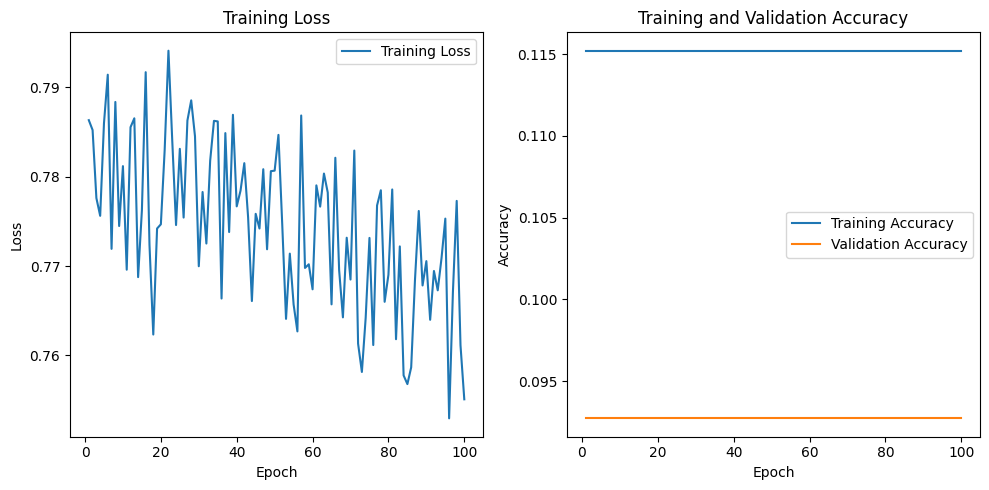

Epoch: 001, Loss: 0.7683, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 002, Loss: 0.7749, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 003, Loss: 0.7606, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 004, Loss: 0.7603, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 005, Loss: 0.7669, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 006, Loss: 0.7787, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 007, Loss: 0.7645, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 008, Loss: 0.7653, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 009, Loss: 0.7725, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 010, Loss: 0.7609, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 011, Loss: 0.7683, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 012, Loss: 0.7605, Train Accuracy: 0.1152, Validation Accuracy: 0.0927
Epoch: 013, Loss: 0.7615, Train Accuracy: 0.1152, Validation Acc

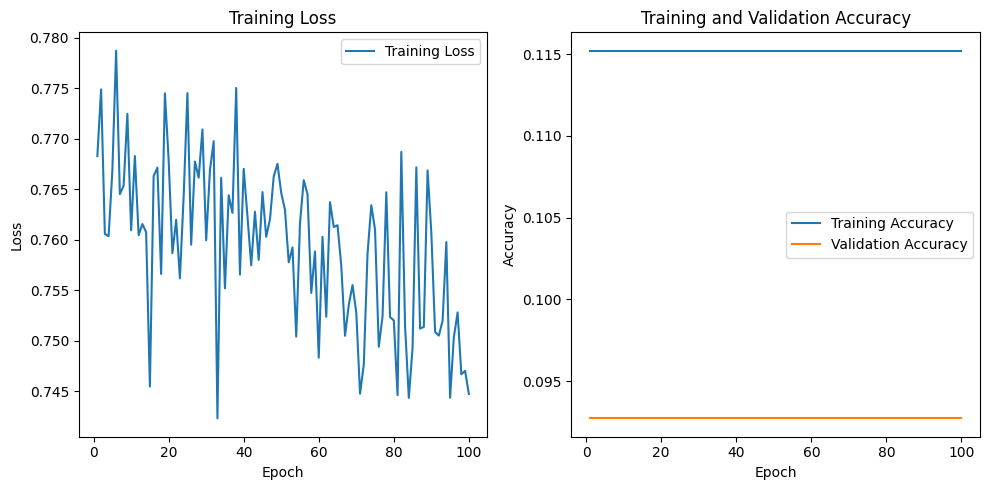

In [19]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss() # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()
      out = model(email_data2.x)
      loss = criterion(out[email_data2.train_mask], email_data2.y.type(torch.LongTensor)[email_data2.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()
      optimizer.step()
      return loss


@torch.no_grad()
def test():
  with torch.no_grad():
      model.eval()
      accuracy_list = [0, 0, 0]
      out = model(email_data2.x)
      pred = out.argmax(dim=1)
      three_set = [email_data2.train_mask, email_data2.val_mask, email_data2.test_mask]
      acc_list = [(pred[elm] == email_data2.y[elm]).sum()/int(elm.sum()) for elm in three_set]
      return acc_list


final_test_acc_list = []
final_loss_list = []
for i in range (3):
  train_loss_values = []
  train_acc_values = []
  val_acc_values = []

  epochs = 100
  for epoch in range(1, epochs+1):
      loss = train()
      train_acc, val_acc, test_acc = test()

      plot_loss=loss.detach().numpy()

      train_loss_values.append(plot_loss)
      train_acc_values.append(train_acc)
      val_acc_values.append(val_acc)

      #print(train_acc, val_acc, test_acc)
      best_val_acc = final_test_acc = 0
      if val_acc > best_val_acc:
          best_val_acc = val_acc
          final_test_acc = test_acc

      print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}')

  print("after {} epochs' training, the best validation accuracy is {}, the best test accuracy is {}".format(epochs, best_val_acc, final_test_acc))

  final_test_acc_list.append(final_test_acc.detach().numpy())
  final_loss_list.append(plot_loss)

    # Plotting
  epochs_range = range(1, 101)

  plt.figure(figsize=(10, 5))

  # Plotting loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, train_loss_values, label='Training Loss')
  plt.title('Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  # Plotting accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, train_acc_values, label='Training Accuracy')
  plt.plot(epochs_range, val_acc_values, label='Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()




In [20]:
final_test_acc_list= np.array(final_test_acc_list)
final_loss_list= np.array(final_loss_list)

# Mean
loss_mean_value = np.mean(final_loss_list)
acc_mean_value = np.mean(final_test_acc_list)
print(f"loss Mean: {loss_mean_value}")
print(f"Acc Mean: {acc_mean_value}")

# Max
loss_max_value = np.max(final_loss_list)
acc_max_value = np.max(final_test_acc_list)
print(f"loss_Max: {loss_max_value}")
print(f"acc_Max: {acc_max_value}")

# Standard Deviation
loss_std_dev = np.std(final_loss_list)
acc_std_dev = np.std(final_test_acc_list)
print(f"loss_Standard Deviation: {loss_std_dev}")
print(f"acc_Standard Deviation: {acc_std_dev}")

loss Mean: 0.7631545066833496
Acc Mean: 0.08609271794557571
loss_Max: 0.7896451354026794
acc_Max: 0.08609271794557571
loss_Standard Deviation: 0.01920480653643608
acc_Standard Deviation: 0.0
